In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/archive.zip')

In [7]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.shape

(11162, 17)

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
label_encoders = {}
for columns in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])
    label_encoders[columns] = le
    df[columns]=label_encoders[columns].fit_transform(df[columns])


In [13]:
x=df.drop('duration',axis=1)
y=df['duration']
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train,y_train)
y_pred=dt_classifier.predict(x_test)


In [15]:
accuracy_score(y_test,y_pred)

0.0044782803403493054

In [16]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n           4       0.00      0.00      0.00         1\n           5       0.00      0.00      0.00         0\n           6       0.00      0.00      0.00         1\n           7       0.17      0.33      0.22         3\n           8       0.00      0.00      0.00         4\n           9       0.00      0.00      0.00         3\n          10       0.33      0.50      0.40         2\n          11       0.00      0.00      0.00         2\n          12       0.00      0.00      0.00         4\n          13       0.00      0.00      0.00         4\n          14       0.00      0.00      0.00         4\n          15       0.00      0.00      0.00         5\n          16       0.00      0.00      0.00         3\n          17       0.00      0.00      0.00         3\n          18       0.00      0.00      0.00         1\n          19       0.00      0.00      0.00         2\n          20       0.00      0.00      0.00         6\n       

In [17]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [20]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education,int64
default,int64
balance,int64
housing,int64
loan,int64
contact,int64
day,int64


In [21]:
df.dtypes.value_counts()

,count
int64,17


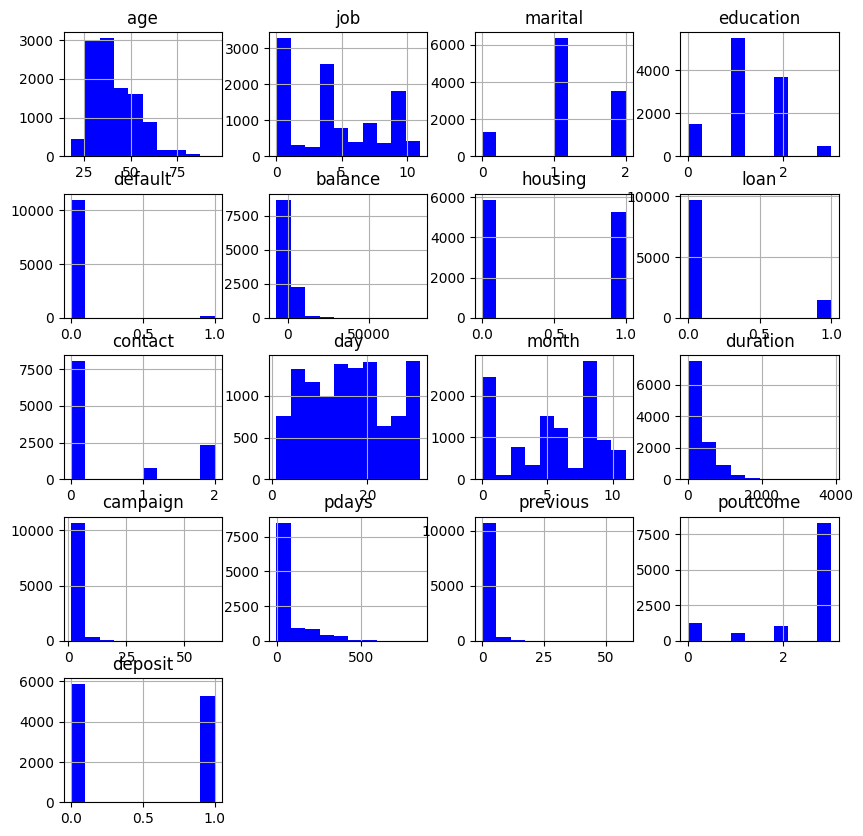

In [22]:
df.hist(figsize=(10,10),color="blue")
plt.show()

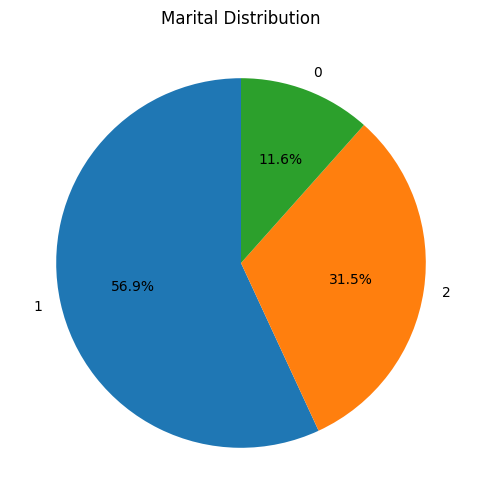

In [23]:
marital_counts=df['marital'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(marital_counts,labels=marital_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Marital Distribution')
plt.show()


<ipython-input-24-618e9631c810>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education',data=df,palette='hls')


Text(0, 0.5, 'education')

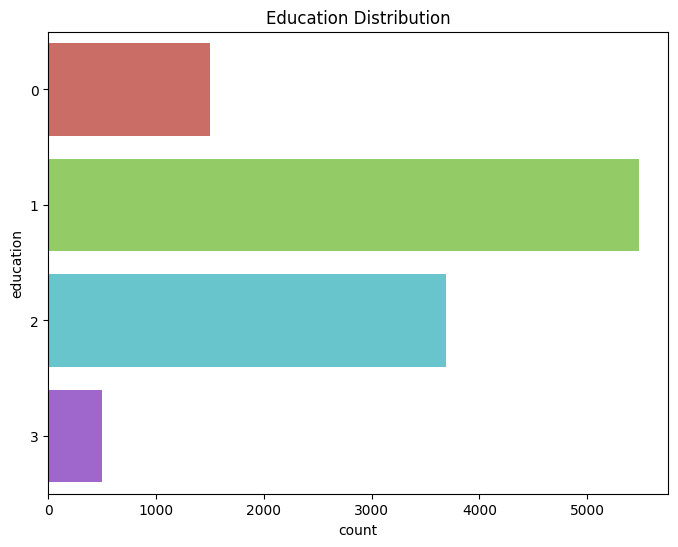

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(y='education',data=df,palette='hls')
plt.title('Education Distribution')
plt.xlabel('count')
plt.ylabel('education')


<ipython-input-31-9b1e041efa02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='housing',data=df,palette='hls')


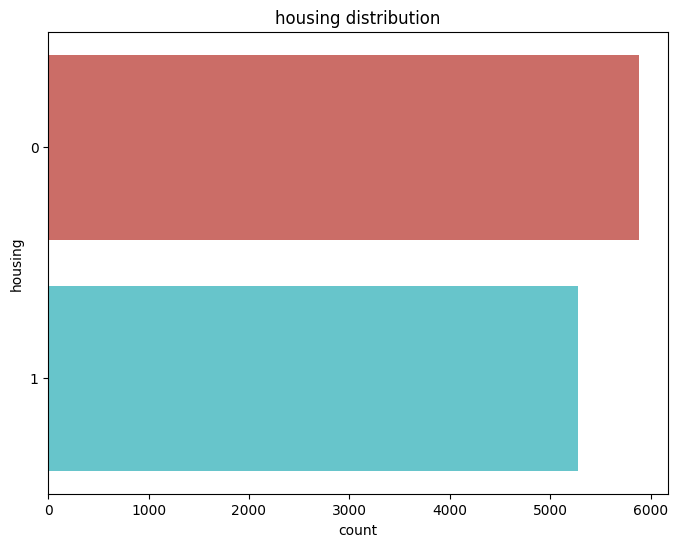

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(y='housing',data=df,palette='hls')
plt.title('housing distribution')
plt.xlabel('count')
plt.ylabel('housing')
plt.show()


In [34]:
from sklearn.tree import plot_tree

In [48]:
cn=['no','yes'],'unknown'
fn=x_train.columns
print(cn)
print(fn)

(['no', 'yes'], 'unknown')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')


In [49]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

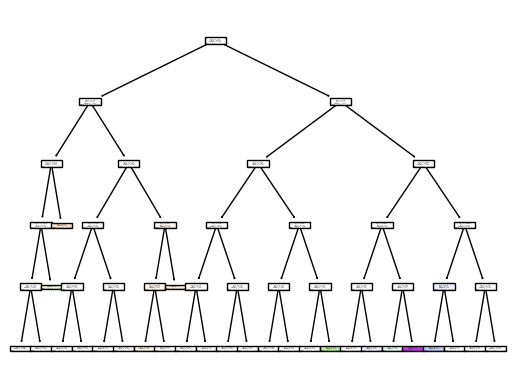

In [53]:
plot_tree(dt, filled=True)
plt.show()
